# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [2]:
# %pip install --upgrade plotly

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
print(df_data.shape)
print(df_data.columns)
print(df_data['year'].min())
print(df_data['year'].max())

(962, 16)
Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')
1901
2020


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [6]:
print(df_data.duplicated().sum())


0


### Check for NaN Values

In [7]:
print(df_data.isna().any()) 
print('------------')
print(df_data.isna().any().any()) 


year                     False
category                 False
prize                    False
motivation                True
prize_share              False
laureate_type            False
full_name                False
birth_date                True
birth_city                True
birth_country             True
birth_country_current     True
sex                       True
organization_name         True
organization_city         True
organization_country      True
ISO                       True
dtype: bool
------------
True


In [8]:
print(df_data.isnull().sum()[df_data.isna().sum() > 0])


motivation                88
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64


### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [15]:
print(df_data['birth_date'].dtype)
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'])
print(df_data['birth_date'].dtype)

object
datetime64[ns]


#### Add a Column with the Prize Share as a Percentage

In [9]:
df_data['share_pct'] = df_data['prize_share'].apply(lambda x: eval(x)) * 100
print(df_data['share_pct'])


0     100.00
1     100.00
2     100.00
3      50.00
4      50.00
       ...  
957    33.33
958   100.00
959    25.00
960    25.00
961    50.00
Name: share_pct, Length: 962, dtype: float64


In [10]:
print(df_data)

     year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
957  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020       Peace                      The Nobel Peace Prize 2020   
959  2020     Physics                 The Nobel Prize in Physics 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ..

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [11]:
# it opens in browser
import pandas as pd
import plotly.express as px

gender_counts = df_data['sex'].value_counts()

# Create the donut chart
fig = px.pie(
    names=gender_counts.index,
    values=gender_counts.values,
    hole=0.4,
    title='Percentage of Male vs. Female Nobel Laureates'
)

fig.show()

In [14]:
print(df_data.columns)

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO', 'share_pct'],
      dtype='object')


# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [16]:
first_three_females = df_data[df_data['sex'] == 'Female'][["year","prize","birth_country"]].reset_index(drop=True)
print(first_three_females.head(3))

   year                               prize                     birth_country
0  1903     The Nobel Prize in Physics 1903           Russian Empire (Poland)
1  1905          The Nobel Peace Prize 1905  Austrian Empire (Czech Republic)
2  1909  The Nobel Prize in Literature 1909                            Sweden


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [17]:
repeat_winners = df_data['full_name'].value_counts()
repeat_winners = repeat_winners[repeat_winners>1]
print(repeat_winners.index)


# Display repeat winner names and their prize info
df_data[df_data['full_name'].isin(repeat_winners.index)][['full_name', 'year', 'category', 'prize']]

Index(['Comité international de la Croix Rouge (International Committee of the Red Cross)',
       'Frederick Sanger', 'John Bardeen',
       'Office of the United Nations High Commissioner for Refugees (UNHCR)',
       'Linus Carl Pauling', 'Marie Curie, née Sklodowska'],
      dtype='object', name='full_name')


,full_name,year,category,prize
18,"Marie Curie, née Sklodowska",1903,Physics,The Nobel Prize in Physics 1903
62,"Marie Curie, née Sklodowska",1911,Chemistry,The Nobel Prize in Chemistry 1911
89,Comité international de la Croix Rouge (Intern...,1917,Peace,The Nobel Peace Prize 1917
215,Comité international de la Croix Rouge (Intern...,1944,Peace,The Nobel Peace Prize 1944
278,Linus Carl Pauling,1954,Chemistry,The Nobel Prize in Chemistry 1954
283,Office of the United Nations High Commissioner...,1954,Peace,The Nobel Peace Prize 1954
297,John Bardeen,1956,Physics,The Nobel Prize in Physics 1956
306,Frederick Sanger,1958,Chemistry,The Nobel Prize in Chemistry 1958
340,Linus Carl Pauling,1962,Peace,The Nobel Peace Prize 1962
348,Comité international de la Croix Rouge (Intern...,1963,Peace,The Nobel Peace Prize 1963


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [18]:
category_counts = df_data['category'].value_counts()
print(category_counts)

category
Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: count, dtype: int64


In [19]:
import plotly.express as px

fig = px.bar(
    category_counts,
    x=category_counts.index,
    y=category_counts.values,
    color=category_counts.values,
    color_continuous_scale='Aggrnyl',
    title='Number of Nobel Prizes per Category'
)

fig.update_layout(coloraxis_showscale=False)  # Hide color bar
fig.show()

In [20]:
print("Number of categories:", df_data['category'].nunique())
print("Most prizes:", category_counts.idxmax(), "-", category_counts.max())
print("Fewest prizes:", category_counts.idxmin(), "-", category_counts.min())


Number of categories: 6
Most prizes: Medicine - 222
Fewest prizes: Economics - 86


**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [21]:
df_data[df_data['category']=="Economics"][["year","category","full_name"]].head(3)

,year,category,full_name
393,1969,Economics,Jan Tinbergen
394,1969,Economics,Ragnar Frisch
402,1970,Economics,Paul A. Samuelson


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [24]:
import plotly.express as px

# .dropna removes null values
gender_category_counts = df_data.dropna(subset=['sex'])

# use size() instead of .value_counts() since there are multiple columns
grouped = gender_category_counts.groupby(['category', 'sex']).size().reset_index(name='count')

# Plot as a stacked bar chart
fig = px.bar(
    grouped,
    x='category',
    y='count',
    color='sex',
    barmode='stack',
    title='Number of Prizes Awarded per Category split by Men and Women'
)

fig.show()


# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [34]:
prizes_per_year = df_data.groupby('year').size().reset_index(name='count')
prizes_per_year['rolling_avg'] = prizes_per_year['count'].rolling(window=5).mean()

print(prizes_per_year)


     year  count  rolling_avg
0    1901      6          NaN
1    1902      7          NaN
2    1903      7          NaN
3    1904      6          NaN
4    1905      5         6.20
..    ...    ...          ...
112  2016     11        11.60
113  2017     12        12.00
114  2018     13        12.00
115  2019     14        12.20
116  2020     12        12.40

[117 rows x 3 columns]


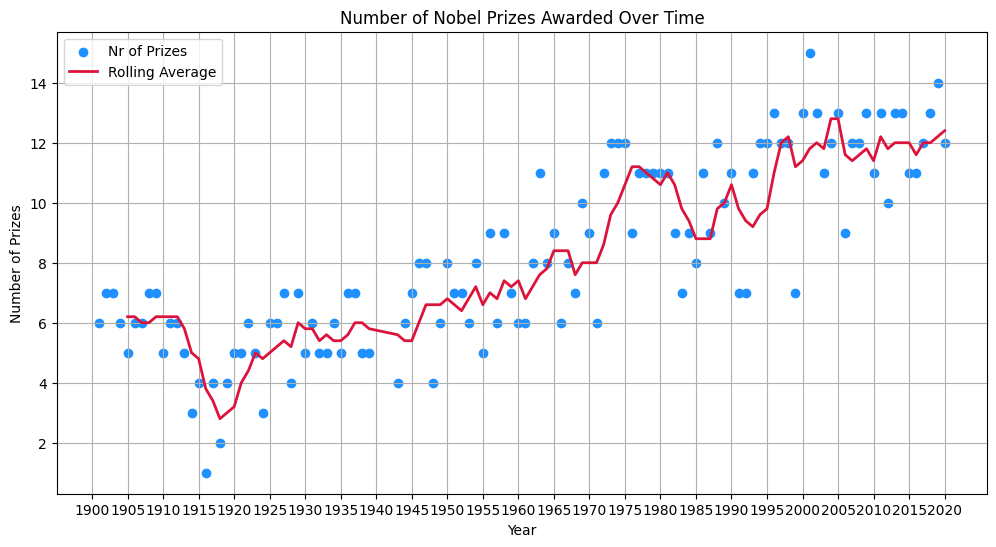

In [35]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

# Scatter plot of raw data in 'dodgerblue'
plt.scatter(prizes_per_year['year'], prizes_per_year['count'], color='dodgerblue', label='Nr of Prizes')

# Line plot of rolling average in 'crimson'
plt.plot(prizes_per_year['year'], prizes_per_year['rolling_avg'], color='crimson', linewidth=2, label='Rolling Average')

# X-axis ticks every 5 years from 1900 to 2020
plt.xticks(np.arange(1900, 2025, 5))

plt.xlabel('Year')
plt.ylabel('Number of Prizes')
plt.title('Number of Nobel Prizes Awarded Over Time')
plt.legend()
plt.grid(True)
plt.show()


# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [45]:
top20_countries = df_data.groupby(['birth_country_current']).size().reset_index(name='prize').head(20)
top20_countries = top20_countries.sort_values('prize', ascending=False).head(20)
print(top20_countries)


               birth_country_current  prize
11                            Canada     20
3                            Austria     18
13                             China     12
2                          Australia     10
7                            Belgium      9
18                    Czech Republic      6
6                            Belarus      4
1                          Argentina      4
0                            Algeria      2
14                          Colombia      2
12                             Chile      2
8             Bosnia and Herzegovina      2
10                          Bulgaria      1
9                             Brazil      1
5                         Bangladesh      1
4                         Azerbaijan      1
15                        Costa Rica      1
16                           Croatia      1
17                            Cyprus      1
19  Democratic Republic of the Congo      1


In [46]:
import plotly.express as px

fig = px.bar(
    top20_countries,
    x='prize',
    y='birth_country_current',
    orientation='h',
    title='Top 20 Countries by Number of Prizes',
    labels={'prize': 'Number of Prizes', 'birth_country_current': 'Country'},
    color='prize',
    color_continuous_scale='Aggrnyl'
)

fig.update_layout(coloraxis_showscale=False)
fig.show()


# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [49]:
import plotly.express as px

country_prizes = df_data.groupby('birth_country_current').size().reset_index(name='prize')

# Add ISO 3-letter country codes from the original dataset
# Assuming 'ISO' column exists in the original DataFrame
country_prizes = pd.merge(country_prizes, df_data[['birth_country_current', 'ISO']], on='birth_country_current', how='left').drop_duplicates(subset=['birth_country_current'])

# Plot choropleth
fig = px.choropleth(
    country_prizes,
    locations='ISO',                  
    color='prize',                    
    hover_name='birth_country_current',
    color_continuous_scale='matter',
    title='Number of Nobel Prizes by Country'
)

fig.show()


# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [75]:
country_category = df_data.groupby(['birth_country_current', 'category']).size().reset_index(name='cat_prize')
country_total = df_data.groupby('birth_country_current').size().reset_index(name='total_prize')

# on tells use matching row which is birth country here
merged = pd.merge(country_category, country_total, on='birth_country_current')
merged = merged.sort_values('total_prize', ascending=False)

print(merged)


        birth_country_current    category  cat_prize  total_prize
203  United States of America  Literature         10          281
201  United States of America   Chemistry         55          281
202  United States of America   Economics         49          281
204  United States of America    Medicine         78          281
205  United States of America       Peace         19          281
..                        ...         ...        ...          ...
189                  Trinidad  Literature          1            1
207                 Venezuela    Medicine          1            1
208                   Vietnam       Peace          1            1
209                     Yemen       Peace          1            1
210                  Zimbabwe       Peace          1            1

[211 rows x 4 columns]


In [86]:
# Step 1: Get the top 6 countries by total prizes
top6_countries = merged['birth_country_current'].drop_duplicates().head(6)
print(top6_countries)

# Step 2: Filter merged data to include only those
top6_data = merged[merged['birth_country_current'].isin(top6_countries)]

fig = px.bar(
    top6_data,
    x='cat_prize',
    y='birth_country_current',
    color='category',
    orientation='h',
    title='Top 6 Countries: Prizes by Category',
    labels={'cat_prize': 'Number of Prizes', 'birth_country_current': 'Country', 'category': 'Category'}
)

fig.update_layout(barmode='stack')
fig.show()



203    United States of America
196              United Kingdom
72                      Germany
65                       France
178                      Sweden
112                       Japan
Name: birth_country_current, dtype: object


### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [88]:
by_year_country = df_data.groupby(['year', 'birth_country_current']).size().reset_index(name='yearly_prizes')
print(by_year_country)

     year     birth_country_current  yearly_prizes
0    1901                    France              2
1    1901                   Germany              1
2    1901               Netherlands              1
3    1901                    Poland              1
4    1901               Switzerland              1
..    ...                       ...            ...
622  2019  United States of America              3
623  2020                    France              1
624  2020                   Germany              1
625  2020            United Kingdom              2
626  2020  United States of America              7

[627 rows x 3 columns]


In [97]:
by_year_country = by_year_country.sort_values(['birth_country_current', 'year'])
by_year_country['cumulative_prizes'] = by_year_country.groupby('birth_country_current')['yearly_prizes'].cumsum()


     year     birth_country_current  yearly_prizes  cumulative_prizes
234  1957                   Algeria              1                  1
469  1997                   Algeria              1                  2
149  1936                 Argentina              1                  1
186  1947                 Argentina              1                  2
366  1980                 Argentina              1                  3
..    ...                       ...            ...                ...
626  2020  United States of America              7                281
371  1980                 Venezuela              1                  1
324  1973                   Vietnam              1                  1
563  2011                     Yemen              1                  1
252  1960                  Zimbabwe              1                  1

[627 rows x 4 columns]


In [98]:
import plotly.express as px

fig = px.line(
    by_year_country,
    x='year',
    y='cumulative_prizes',
    color='birth_country_current',
    title='Cumulative Number of Nobel Prizes by Country Over Time',
    labels={'cumulative_prizes': 'Total Prizes', 'birth_country_current': 'Country'}
)

fig.show()


# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [103]:
top_orgs = df_data.groupby(['organization_name']).size().reset_index(name='prize')
top_orgs = top_orgs.sort_values(['prize'], ascending=False)

                                     organization_name  prize
196                           University of California     40
68                                  Harvard University     29
167                                Stanford University     23
117        Massachusetts Institute of Technology (MIT)     21
198                              University of Chicago     20
..                                                 ...    ...
217                             University of Missouri      1
220  University of Nottingham, School of Physics an...      1
224                            University of Rochester      1
262             École Supérieure de Physique et Chimie      1
263  École municipale de physique et de chimie indu...      1

[264 rows x 2 columns]


In [125]:
import plotly.express as px

fig = px.bar(
    top_orgs,
    x='prize',
    y='organization_name',
    orientation='h',
    title='Top 20 Research Institutions by Number of Prizes',
    labels={'prize': 'Number of Prizes', 'organization_name': 'Institution'},
    color='prize',
    color_continuous_scale='Viridis'
)

fig.update_layout(coloraxis_showscale=False)
fig.show()


In [113]:
df_data['organization_name'].value_counts().loc[['University of Chicago', 'Harvard University']]


organization_name
University of Chicago    20
Harvard University       29
Name: count, dtype: int64

In [117]:
print(df_data.columns)

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO', 'share_pct'],
      dtype='object')


# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [130]:
top_cities = df_data.groupby(["organization_city"]).size().reset_index(name='prize')
top_cities = top_cities.sort_values("prize", ascending=False)

top_20 = top_cities['organization_city'].drop_duplicates().head(20)
top_cities = top_cities[top_cities['organization_city'].isin(top_20)]

print(top_cities)

    organization_city  prize
34      Cambridge, MA     50
121      New York, NY     45
33          Cambridge     31
92             London     27
128             Paris     25
156      Stanford, CA     24
12       Berkeley, CA     21
39        Chicago, IL     20
135     Princeton, NJ     19
129      Pasadena, CA     17
13             Berlin     12
126            Oxford     12
108            Moscow     10
157         Stockholm     10
23         Boston, MA      9
71         Heidelberg      9
119     New Haven, CT      9
110            Munich      9
93    Los Angeles, CA      8
65          Göttingen      8


In [131]:
import plotly.express as px

fig = px.bar(
    top_cities,
    x='prize',
    y='organization_city',
    orientation='h',
    title='Top 20 Organization City by Number of Prizes',
    labels={'prize': 'Number of Prizes', 'organization_city': 'City'},
    color='prize',
    color_continuous_scale='Viridis'
)

fig.update_layout(coloraxis_showscale=False)
fig.show()


# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [144]:
top_birth_cities = df_data.groupby('birth_city').size().reset_index(name='prize')
top_birth_cities = top_birth_cities.sort_values('prize', ascending=False).head(20)


In [145]:
import plotly.express as px

fig = px.bar(
    top_birth_cities,
    x='prize',
    y='birth_city',
    orientation='h',
    title='Top 20 Birth Cities of Nobel Laureates',
    labels={'prize': 'Number of Laureates', 'birth_city': 'Birth City'},
    color='prize',
    color_continuous_scale='Plasma'
)

fig.update_layout(coloraxis_showscale=False)
fig.show()


# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [166]:
org_sunburst = (
    df_data
    .groupby(['organization_country', 'organization_city', 'organization_name'])
    .size()
    .reset_index(name='prize_count')
)

print(org_sunburst)


         organization_country     organization_city  \
0                   Argentina          Buenos Aires   
1                   Argentina          Buenos Aires   
2                   Australia              Canberra   
3                   Australia             Melbourne   
4                   Australia              Nedlands   
..                        ...                   ...   
286  United States of America    West Lafayette, IN   
287  United States of America        Wilmington, DE   
288  United States of America        Woods Hole, MA   
289  United States of America         Worcester, MA   
290  United States of America  Yorktown Heights, NY   

                                     organization_name  prize_count  
0                   Institute for Biochemical Research            1  
1    Instituto de Biologia y Medicina Experimental ...            1  
2                       Australian National University            1  
3    Walter and Eliza Hall Institute for Medical Re...     

In [ ]:
import plotly.express as px
import pandas as pd

# 1. Group the data
org_sunburst = df_data.groupby(['organization_country', 'organization_city', 'organization_name']).size().reset_index(name='prize_count')

# (Optional) Exclude rows with missing data in these columns
org_sunburst.dropna(subset=['organization_country', 'organization_city', 'organization_name'], inplace=True)

# 2. Create sunburst
fig = px.sunburst(
    org_sunburst,
    path=['organization_country', 'organization_city', 'organization_name'],
    values='prize_count',
    title='Sunburst: Country → City → Organization'
    # color='organization_country',  # Uncomment if you'd like coloring by country
    # color_discrete_sequence=px.colors.qualitative.Pastel
)

# 3. Show the figure
fig.show()


# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [183]:
print(df_data['birth_date'].dtype)
df_data['winning_age'] = df_data['year'] - df_data['birth_date'].dt.year

datetime64[ns]


### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [200]:
youngest = df_data.loc[df_data['winning_age'].idxmin()]
print(youngest[['full_name', 'winning_age', 'prize']])

oldest = df_data.loc[df_data['winning_age'].idxmax()]
print(oldest[['full_name', 'winning_age', 'prize']])

average_age = df_data['winning_age'].mean()
print(f"Mean age: {average_age}")

# 75th percentile
percentile_75 = df_data['winning_age'].quantile(0.75)
print(f"75% of laureates are younger than {percentile_75:.2f}")

full_name                Malala Yousafzai
winning_age                         17.00
prize          The Nobel Peace Prize 2014
Name: 885, dtype: object
full_name                        John Goodenough
winning_age                                97.00
prize          The Nobel Prize in Chemistry 2019
Name: 937, dtype: object
Mean age: 59.94860813704497
75% of laureates are younger than 69.00


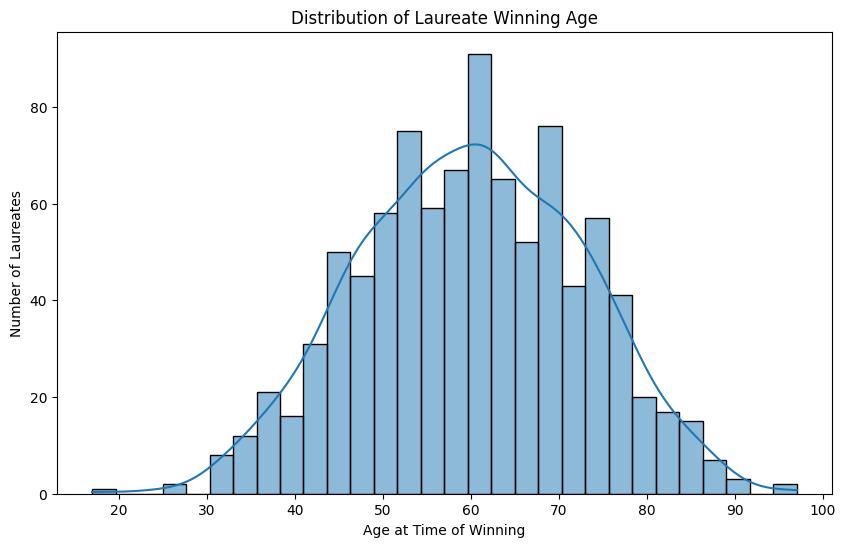

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df_data['winning_age'].dropna(), bins=30, kde=True)
plt.title("Distribution of Laureate Winning Age")
plt.xlabel("Age at Time of Winning")
plt.ylabel("Number of Laureates")
plt.show()

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [202]:
# Drop NaN ages first
age_data = df_data['winning_age'].dropna()

# Get summary statistics
print(age_data.describe())


count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64


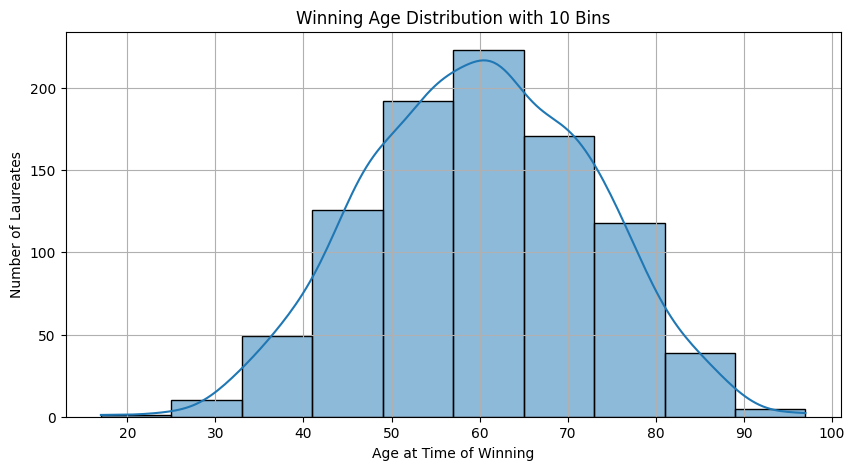

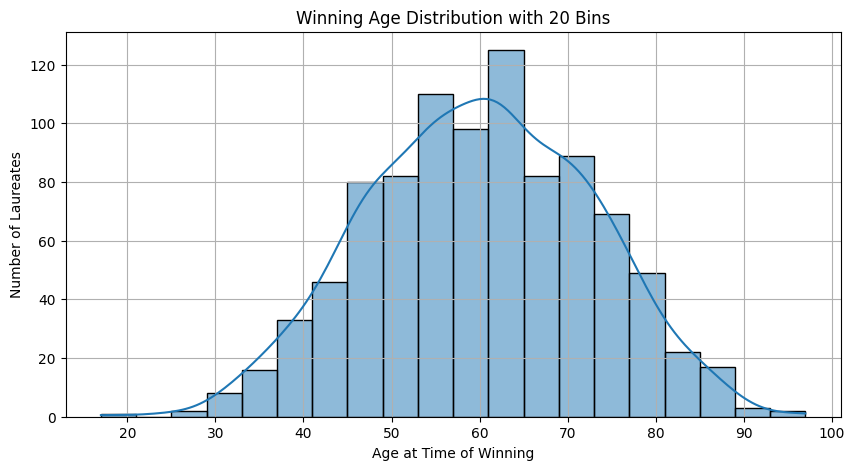

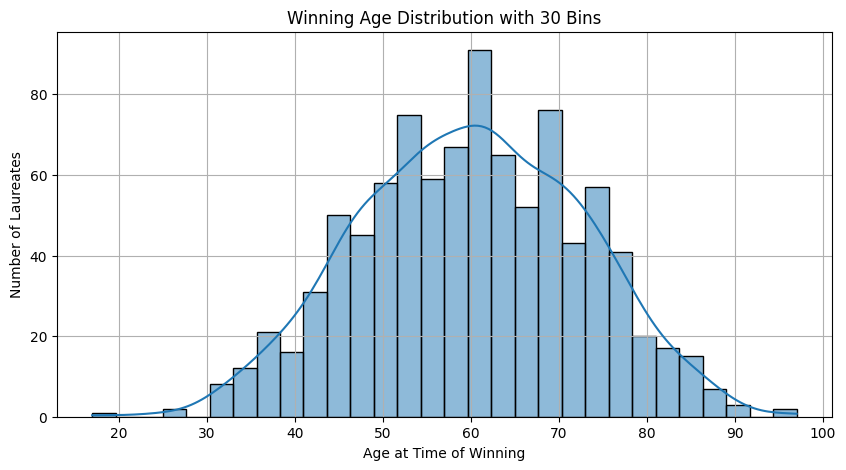

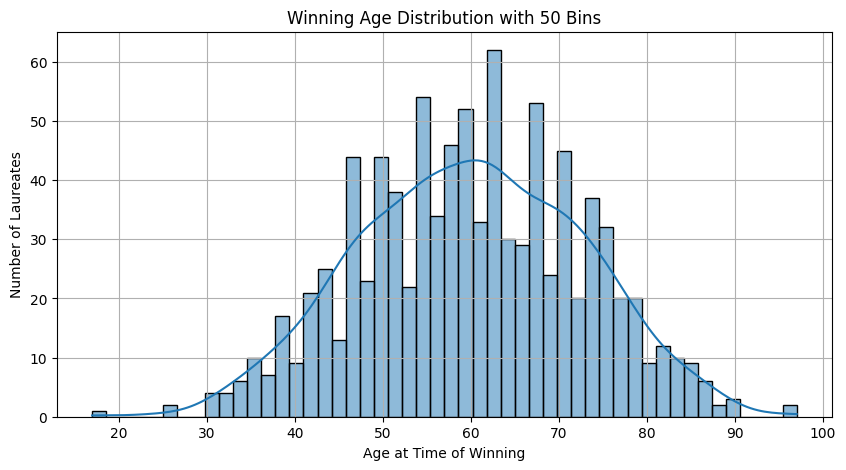

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt

# Try different bin sizes
for bins in [10, 20, 30, 50]:
    plt.figure(figsize=(10, 5))
    sns.histplot(age_data, bins=bins, kde=True)
    plt.title(f"Winning Age Distribution with {bins} Bins")
    plt.xlabel("Age at Time of Winning")
    plt.ylabel("Number of Laureates")
    plt.grid(True)
    plt.show()


### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


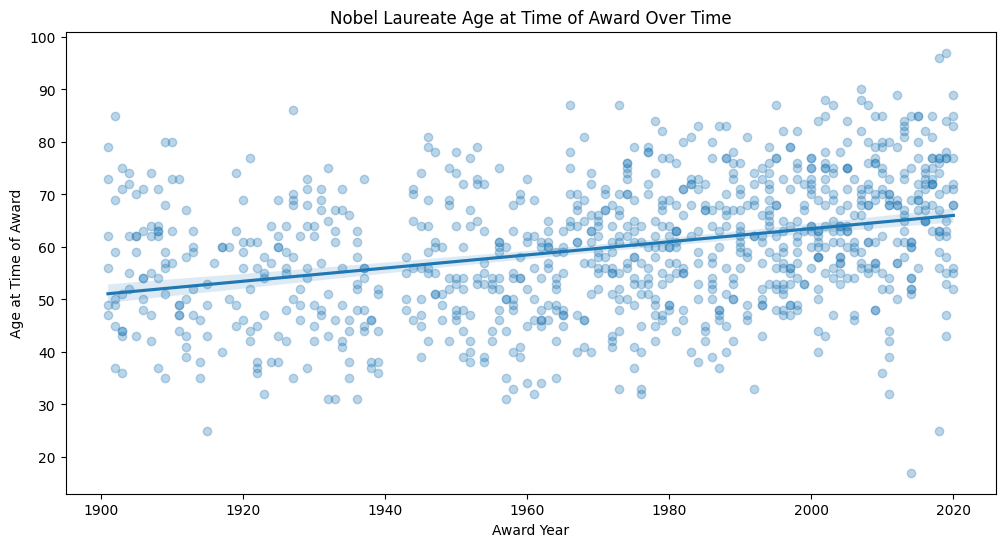

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter + linear regression line
plt.figure(figsize=(12, 6))
sns.regplot(
    data=df_data,
    x='year',
    y='winning_age',
    scatter_kws={'alpha': 0.3}
)
plt.title("Nobel Laureate Age at Time of Award Over Time")
plt.xlabel("Award Year")
plt.ylabel("Age at Time of Award")
plt.show()


### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

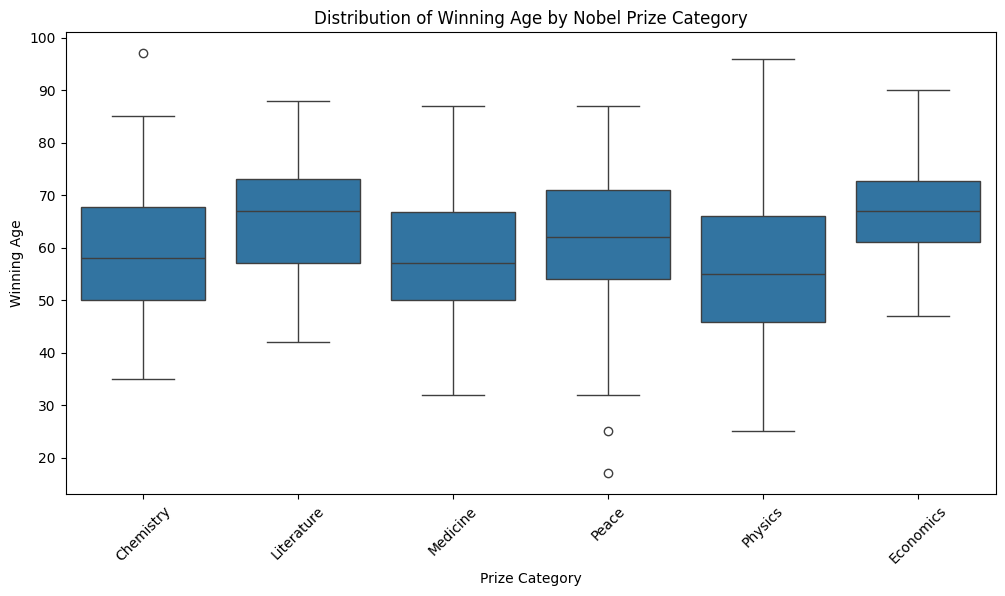

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_data, x='category', y='winning_age')
plt.title("Distribution of Winning Age by Nobel Prize Category")
plt.xlabel("Prize Category")
plt.ylabel("Winning Age")
plt.xticks(rotation=45)
plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


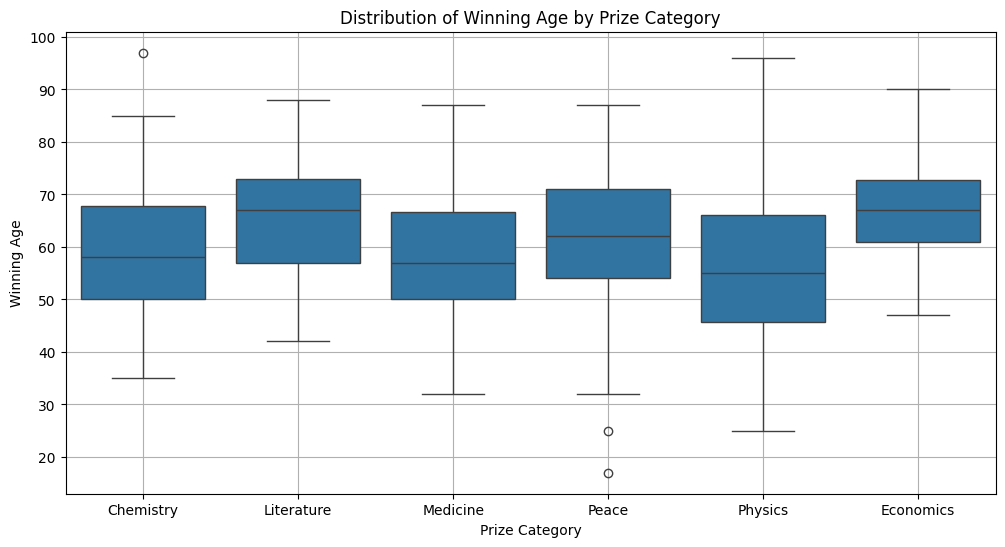

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_data, x='category', y='winning_age')
plt.title("Distribution of Winning Age by Prize Category")
plt.xlabel("Prize Category")
plt.ylabel("Winning Age")
plt.grid(True)
plt.show()


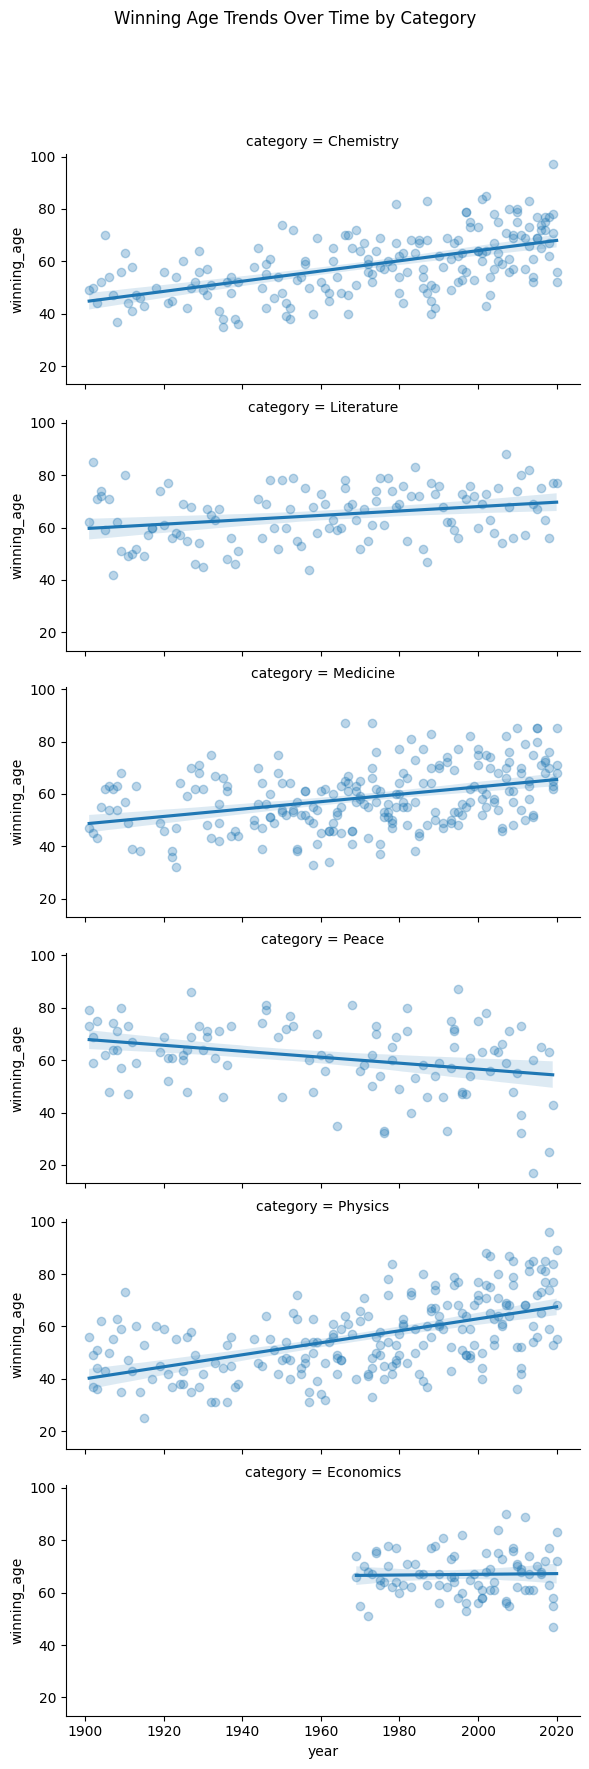

In [211]:
sns.lmplot(
    data=df_data,
    x='year',
    y='winning_age',
    row='category',
    height=3,
    aspect=2,
    scatter_kws={'alpha': 0.3}
)

plt.subplots_adjust(top=0.9)
plt.suptitle("Winning Age Trends Over Time by Category")
plt.show()


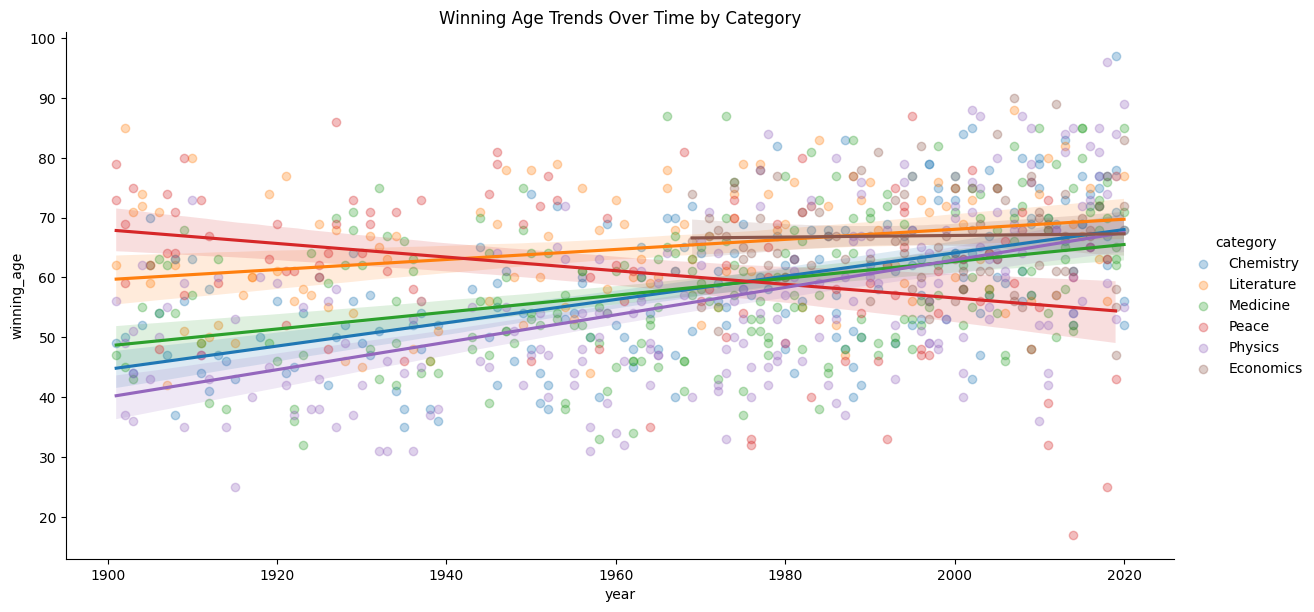

In [212]:
sns.lmplot(
    data=df_data,
    x='year',
    y='winning_age',
    hue='category',
    height=6,
    aspect=2,
    scatter_kws={'alpha': 0.3}
)

plt.title("Winning Age Trends Over Time by Category")
plt.show()